In [8]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("Position_Salaries.csv")

In [5]:
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [60]:
x= data.iloc[:, 1:2].values  
y= data.iloc[:, 2].values  
x=np.array(x).reshape(-1,1)
y=np.array(y)

# Fitting Linear Regression

In [61]:
lm = LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
lm.predict([[6.5]])

array([330378.78787879])

Text(0, 0.5, 'Salary')

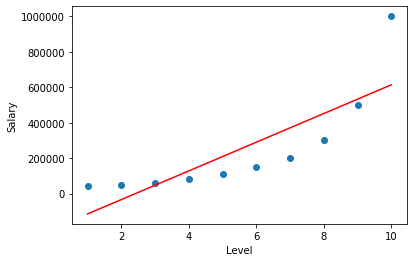

In [63]:
plt.scatter(x,y)
plt.plot(x,lm.predict(x),color='r')
plt.xlabel("Level")
plt.ylabel("Salary")

# Fitting Polynomial Regression

In [72]:
poly = PolynomialFeatures(degree=4)
x_poly=poly.fit_transform(x)
poly.fit(x_poly,y)
linear2 = LinearRegression()
linear2.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

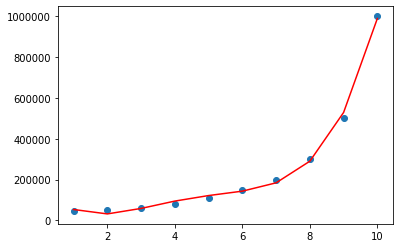

In [73]:
plt.scatter(x,y)
plt.plot(x,linear2.predict(x_poly),color='r')

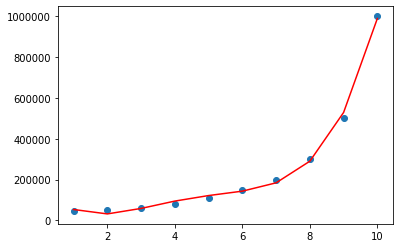

In [74]:
plt.scatter(x,y)
plt.plot(x,linear2.predict(poly.fit_transform(x)),color='r')

In [75]:
lm.predict([[6.5]])

array([330378.78787879])

In [76]:
linear2.predict(poly.fit_transform([[6.5]]))

array([158862.45265153])

In [77]:
data1 = data.copy()

In [79]:
data1["Linear"] = lm.predict(x)
data1["Polynomial"] = linear2.predict(poly.fit_transform(x))

In [83]:
data1["Linear"] = data1.Linear.apply(np.ceil)
data1["Polynomial"] = data1.Polynomial.apply(np.ceil)

In [84]:
data1

,Position,Level,Salary,Linear,Polynomial
0,Business Analyst,1,45000,-114454.0,53357.0
1,Junior Consultant,2,50000,-33575.0,31760.0
2,Senior Consultant,3,60000,47304.0,58643.0
3,Manager,4,80000,128182.0,94633.0
4,Country Manager,5,110000,209061.0,121725.0
5,Region Manager,6,150000,289940.0,143276.0
6,Partner,7,200000,370819.0,184004.0
7,Senior Partner,8,300000,451697.0,289995.0
8,C-level,9,500000,532576.0,528695.0
9,CEO,10,1000000,613455.0,988917.0
